In [99]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline


import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 4, 'lines.markersize':10})  
plt.rcParams['figure.figsize'] = 15, 12


In [100]:
tend = 80 ## hours
dt = 0.1
dx = 0.2 ## cm
L = 40 ## cm
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi = ( 0.99 - 0.94 ) * np.exp( -x / 10 ) + 0.94
Chs = np.zeros(t.shape) #
Fx = np.zeros(t.shape)

In [101]:
from measurements import Ch, C1, C2, C3, Tm, zm, D_SF6w, D_SF6g, Kh, phi_m, z_phi, Vh, SA, D_column, Vi, Ci, Ti, SF6_Hcc

dT = Tm[1::2] - Tm[::2]
dCh = (Ch[1::2] - Ch[::2])
Mi = Ci*Vi # mass injected
h_inj = Vi/SA/phi[x==18]

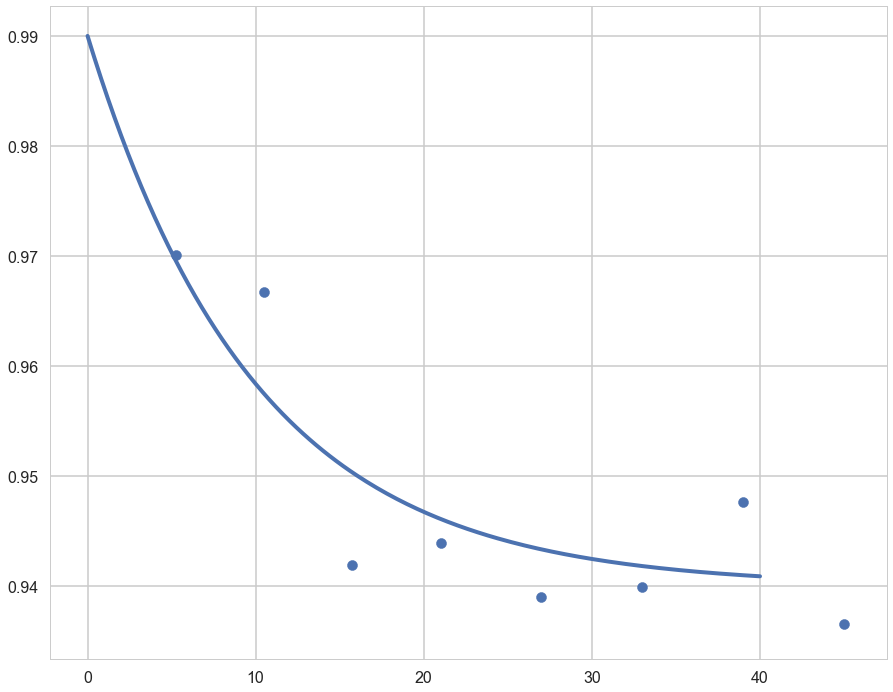

In [102]:
plt.plot(x, phi)
plt.scatter(z_phi, phi_m)

In [103]:
ftc = PorousMediaLab(L, dx, tend, dt, phi)

In [104]:
SF6_init = np.zeros(x.size)
SF6_init[x > 0] = 0
SF6_init[x > 0] = 0
SF6_init[x > 18-h_inj/2] = Ci[0]
SF6_init[x > 18+h_inj/2] = 0.

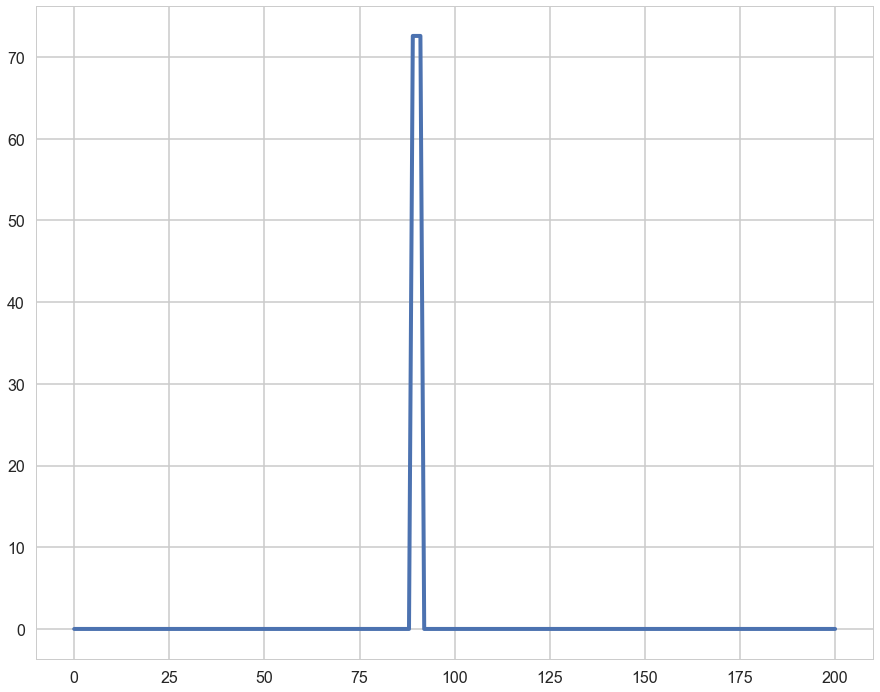

In [105]:
plt.plot(SF6_init)

In [106]:
# theta=0.5
ftc.add_species(is_solute=True, element='SF6w', D=D_SF6w, init_C=SF6_init, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='SF6g', D=D_SF6g, init_C=0, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_henry_law_equilibrium(aq='SF6w', gas='SF6g', Hcc=SF6_Hcc)

In [107]:
Tm[:8]

array([ 0,  2, 26, 28, 52, 54, 78, 80])

In [108]:
for i in range(1, len(ftc.time)):
    ftc.integrate_one_timestep(i)
#     Fx[i] = ftc.estimate_flux_at_top('SF6g', i)
#     if (ftc.time[i] > Tm[0] and ftc.time[i] < Tm[1]):
#         Chs[i] = Chs[i-1] +  Fx[i] * SA / Vh * dt
#     else:
#         Chs[i] = 0
#     ftc.SF6g.bc_top = 0

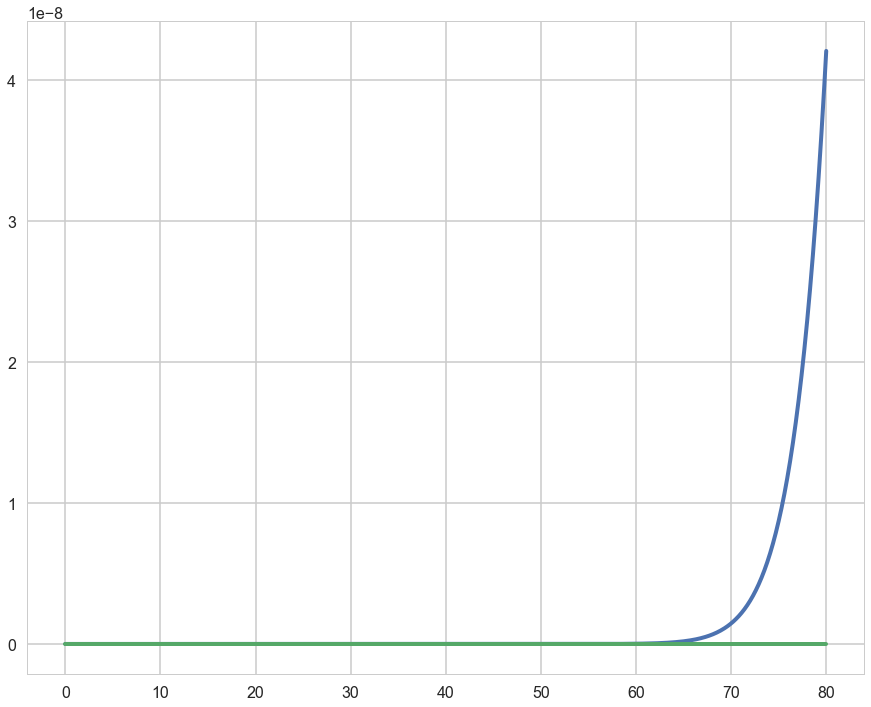

In [109]:
F = ftc.estimate_flux_at_top('SF6g') # dissolved gas flux

# plt.plot(ftc.time, Chs)
plt.plot(ftc.time, F)

F = ftc.estimate_flux_at_top('SF6w') # dissolved gas flux
plt.plot(ftc.time, F)

# plt.scatter(Tm[::2][:4]+1, dCh[:4]*Vh/SA/dT[:4])
# fig, ax1 = plt.subplots()
# ax1.plot(ftc.time, F*(1+1/Hcc))

# ax1.set_ylabel(r'Flux, $[umol/cm^2/h]$')
# ax1.ticklabel_format(style='sci', axis='y', scilimits=(-4,-1))


# ax2=ax1.twinx()
# ax2.scatter(Tm[::2][:4]+1, dCh[:4]*Vh/3.14/r**2/dT[:4])
# ax2.set_ylabel(r'F measured, $[umol/cm^2/h]$')
# ax2.ticklabel_format(style='sci', axis='y', scilimits=(-4,-1))
# plt.ylim([0,2e-4])
# ax1.set_xlabel('Time, [h]')

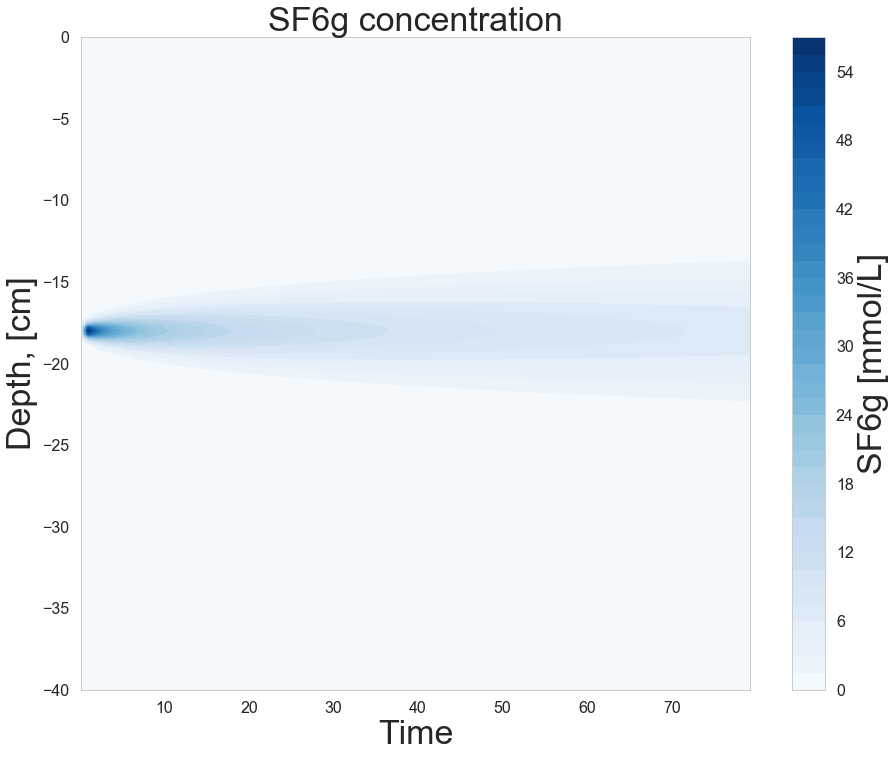

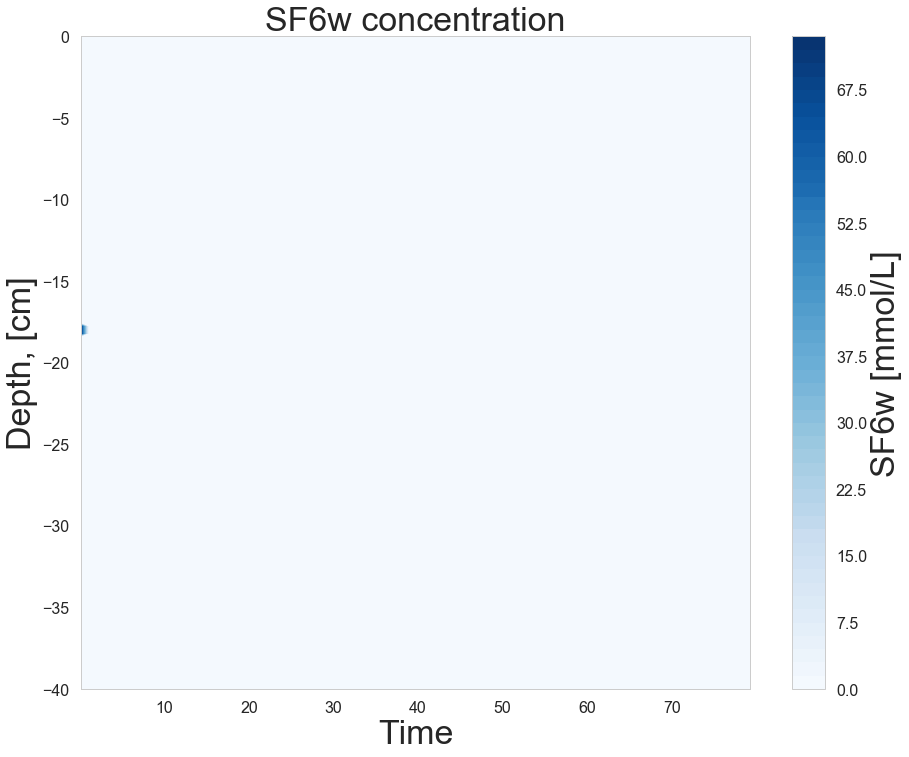

In [110]:
ftc.plot_contourplots(labels=False)

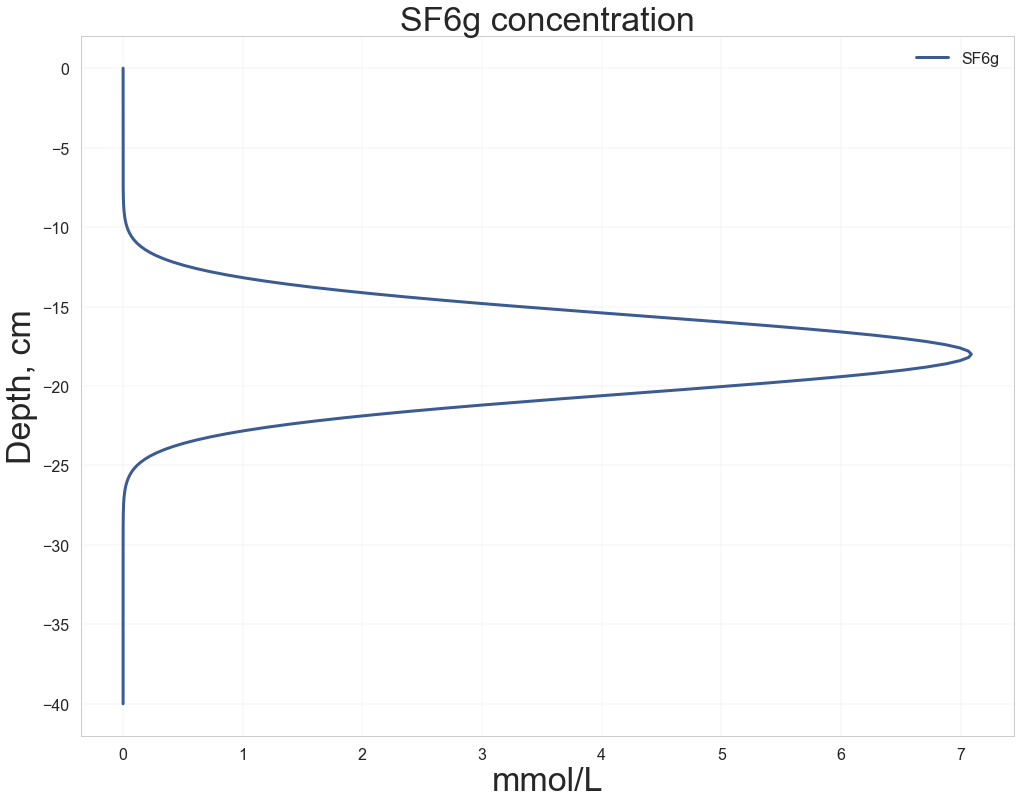

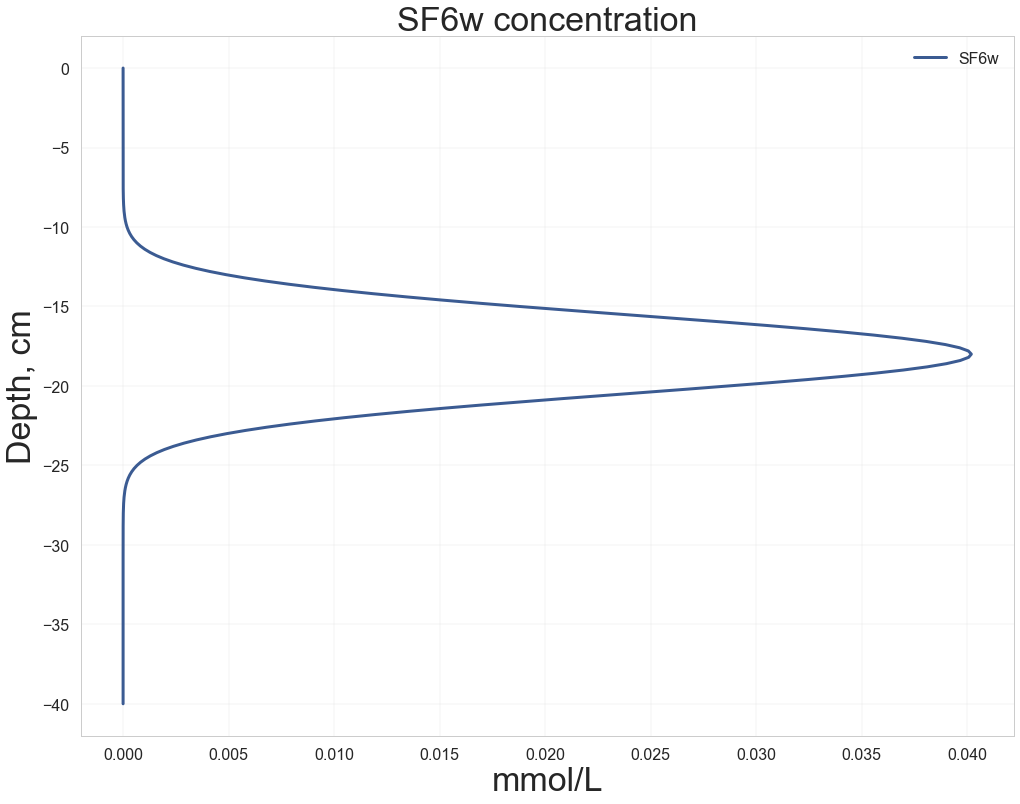

In [111]:
ftc.plot_profiles()

$${\displaystyle H^{cc}=c_{\text{a}}/c_{\text{g}}}$$

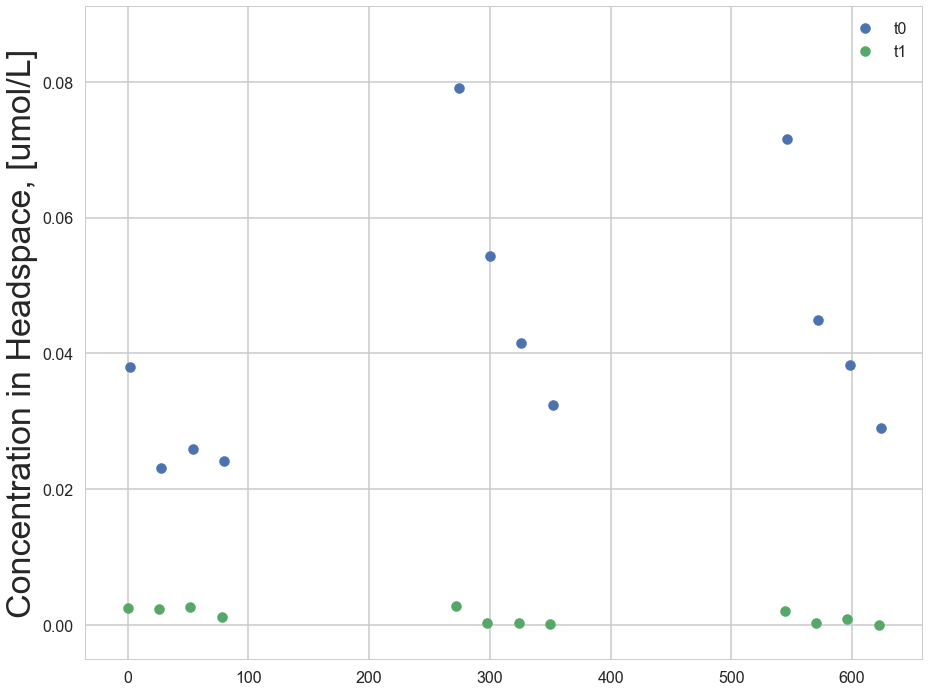

In [112]:
plt.scatter(Tm[1::2], Ch[1::2], label='t0')
plt.scatter(Tm[::2], Ch[::2], label='t1')
plt.ylabel('Concentration in Headspace, [umol/L]')
plt.legend()

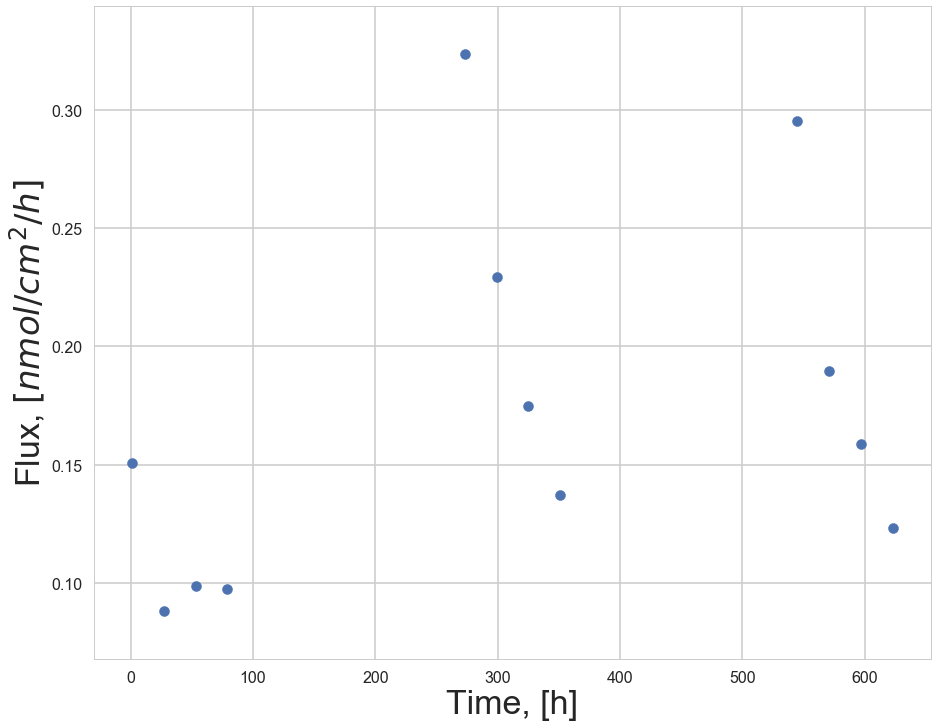

In [113]:
plt.scatter(Tm[::2]+1, dCh*Vh/SA/dT)
# plt.ylim([0, 0.4e-3])
plt.ylabel(r'Flux, $[nmol/cm^2/h]$')
plt.xlabel('Time, [h]')

### 